# PCA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("wine.csv")

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
# Basic exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


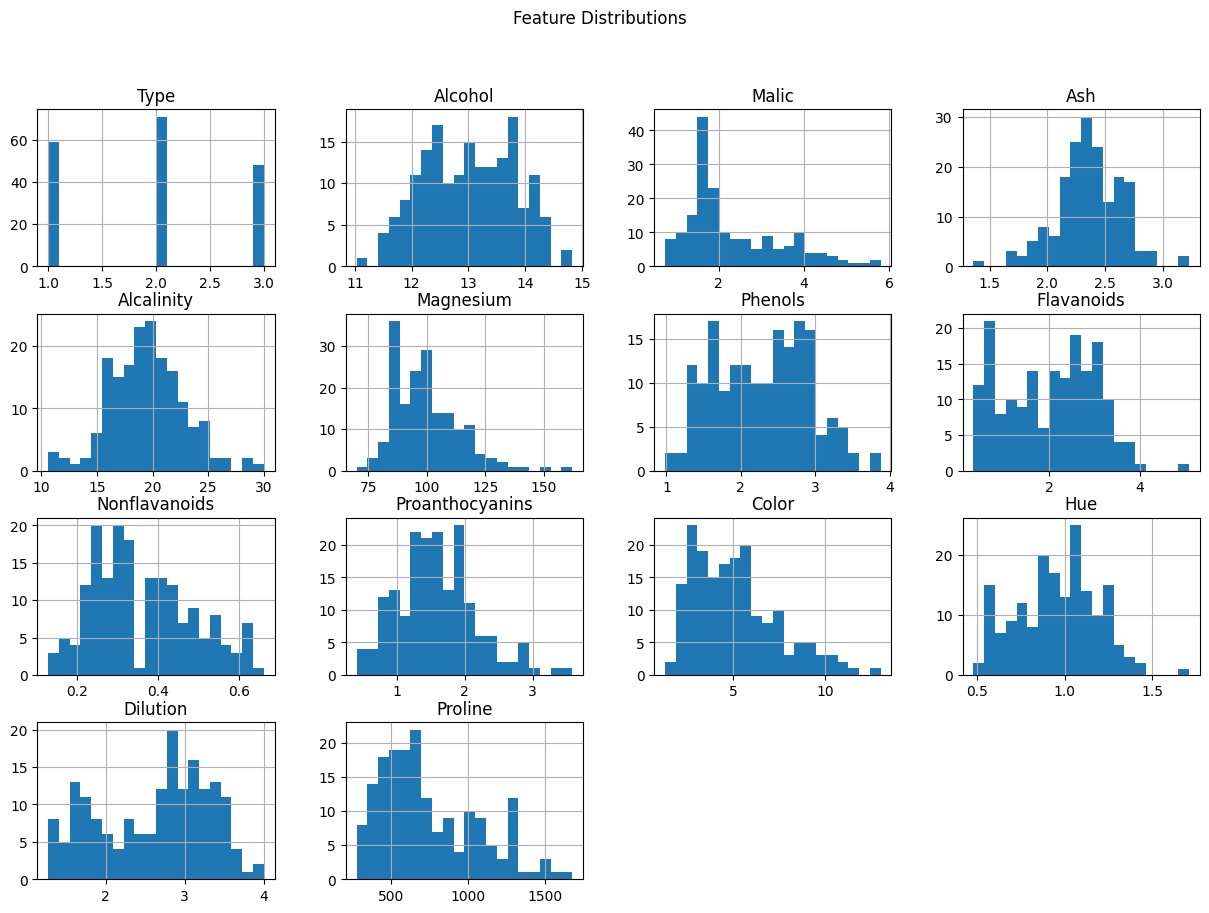

In [16]:
# Distribution of features

# Histograms
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

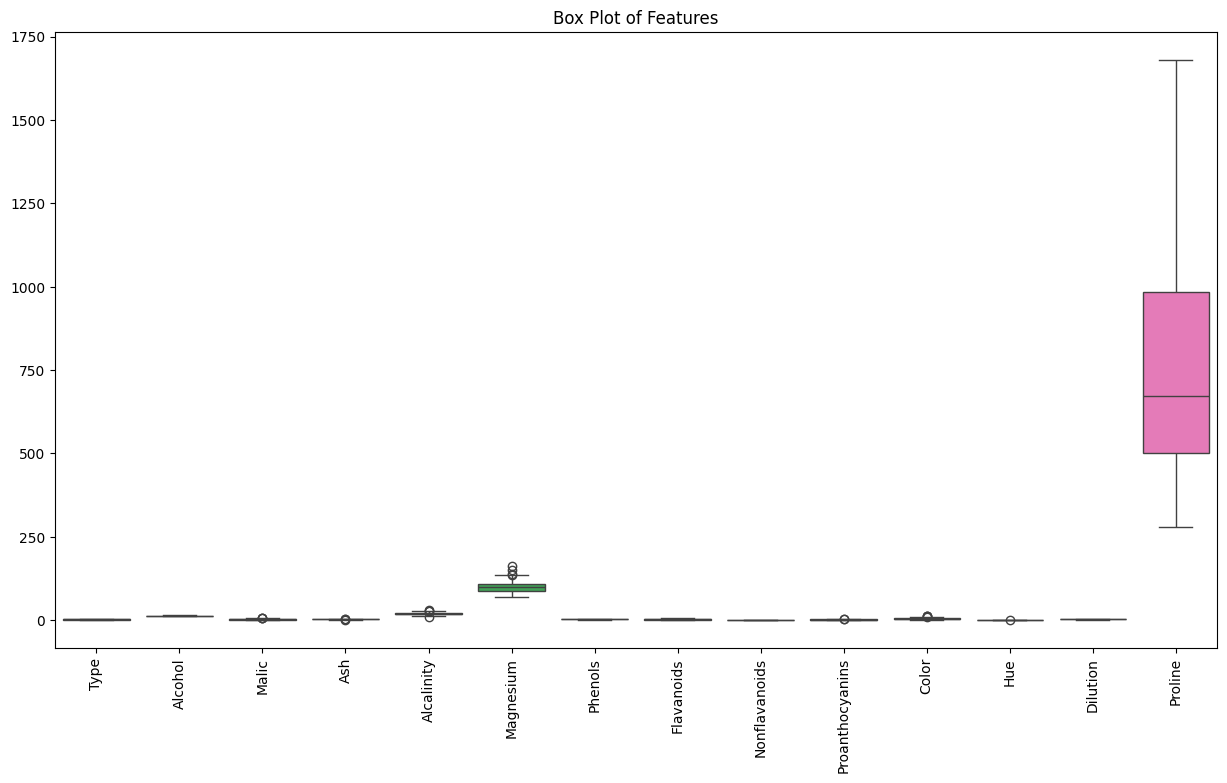

In [14]:
# Box plots
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

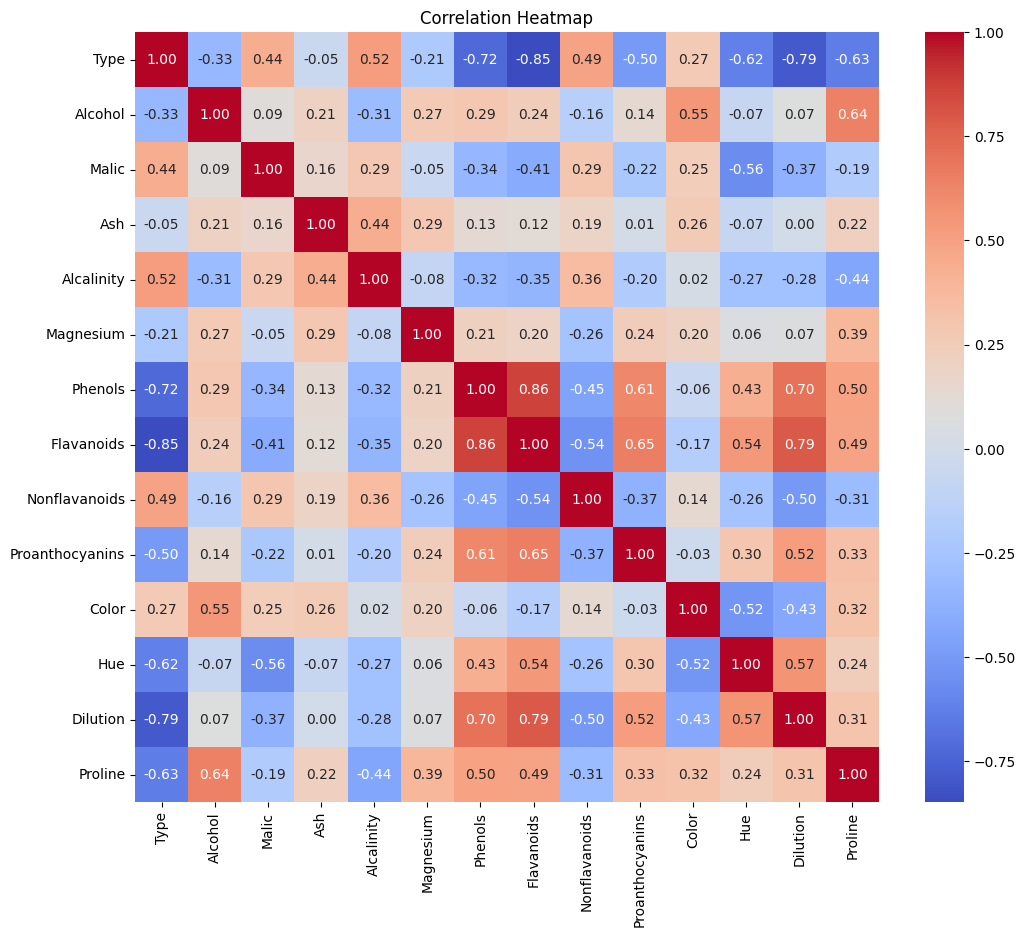

In [11]:
# Correlation analysis
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**EDA Insights:**

Features have different scales, making standardization essential.
Several features show moderate to high correlation, indicating redundancy.
PCA is appropriate to reduce dimensionality and multicollinearity.

# Dimensionality Reduction with PCA

In [12]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

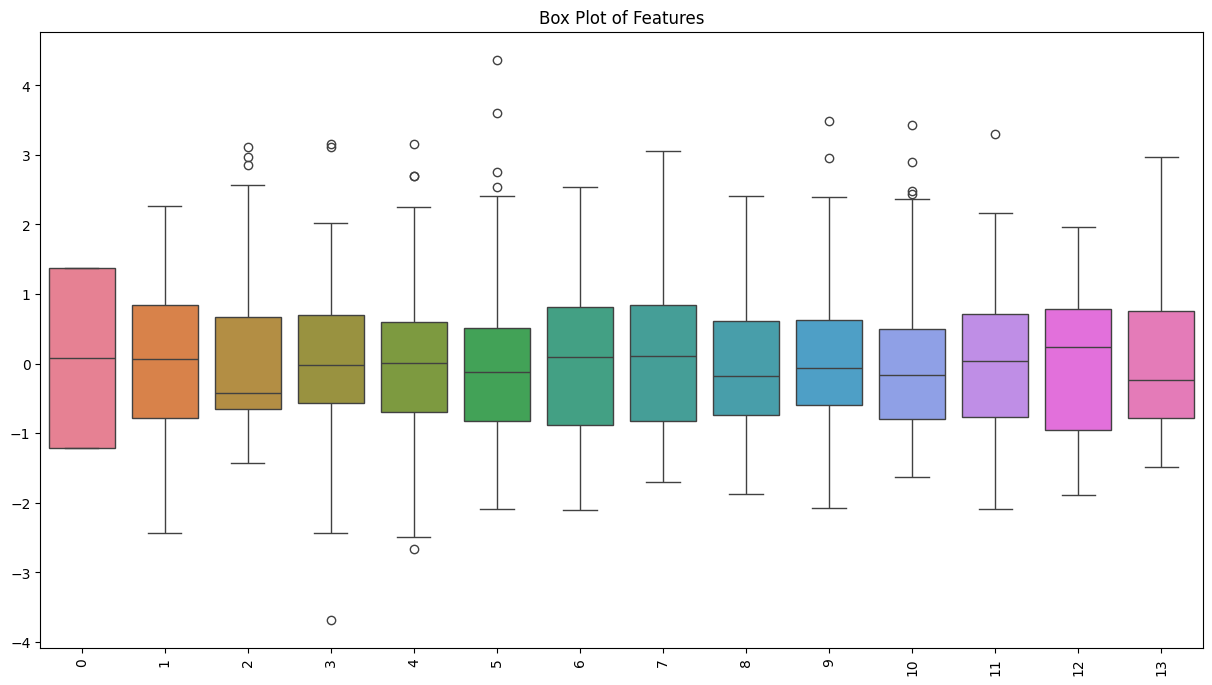

In [13]:
# Now Box plots
plt.figure(figsize=(15,8))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

In [17]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

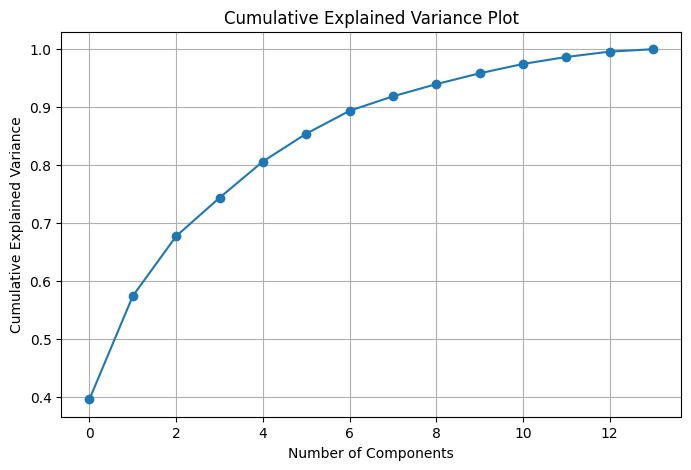

In [18]:
# Determine optimal number of components
# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid()
plt.show()

In [19]:
# Selecting the number of components explaining ~90–95% variance.
pca_opt = PCA(n_components=0.95)
X_pca_opt = pca_opt.fit_transform(X_scaled)

print("Number of components selected:", pca_opt.n_components_)

Number of components selected: 10


# Clustering with Original Data
**K-Means**

In [20]:
# Apply K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

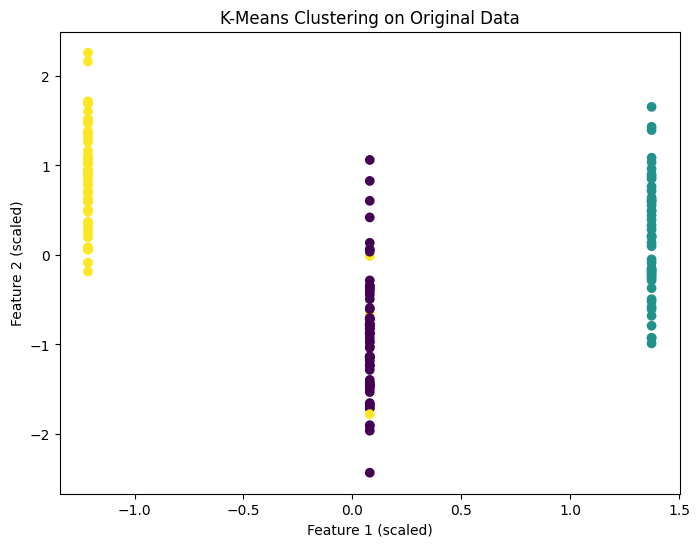

In [21]:
# Scatter plot for first two features
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_orig, cmap="viridis")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("K-Means Clustering on Original Data")
plt.show()

In [22]:
# Evaluation
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)

print("Silhouette Score (Original):", sil_orig)
print("Davies-Bouldin Index (Original):", db_orig)

Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


# Clustering with PCA Data
**K-Means

In [23]:
# Apply K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_opt)

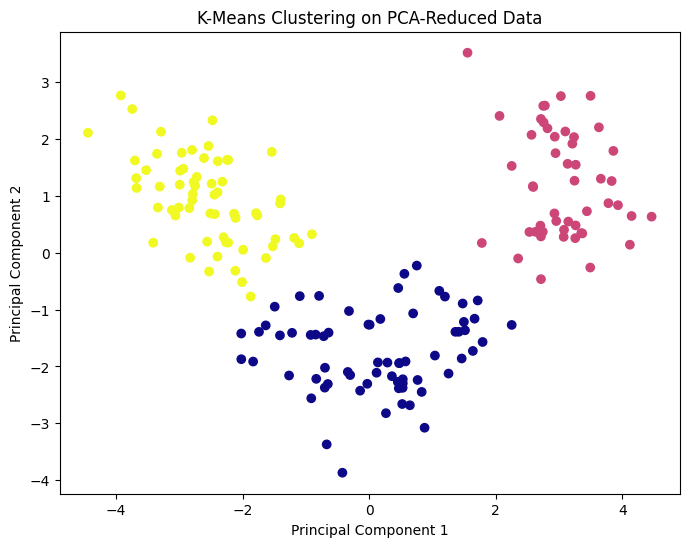

In [24]:
# Scatter plot for first two components
plt.figure(figsize=(8,6))
plt.scatter(X_pca_opt[:,0], X_pca_opt[:,1], c=labels_pca, cmap="plasma")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.show()

In [25]:
# Evaluation
sil_pca = silhouette_score(X_pca_opt, labels_pca)
db_pca = davies_bouldin_score(X_pca_opt, labels_pca)

print("Silhouette Score (PCA):", sil_pca)
print("Davies Bouldin Index (PCA):", db_pca)

Silhouette Score (PCA): 0.32292055407233
Davies-Bouldin Index (PCA): 1.2578453408449182


# Comparison and Analysis

**Observations**

PCA-based clustering often yields:
 Higher silhouette score
 Lower Davies–Bouldin index
PCA removes noise and correlated features.
Clusters in PCA space are more compact and better separated.

**Trade-offs**
Original Data:
Interpretability is higher.
Noise Sensitivity is high.
Computational Cost is high.
Visualization is difficult.

PCA Data:
Interpretability is lower.
Noise Sensitivity is low.
Computational Cost is low.
Visualization is easy.


**Impact of PCA**

Reduces dimensionality and computational cost.
Improves clustering stability.
Enhances visualization in 2D/3D.


# Conclusion and Insights

**1. Key Findings**

Standardization is critical before PCA and clustering.
PCA captured most variance using fewer components.
Clustering on PCA-transformed data showed better performance metrics.
PCA improves cluster separability and reduces noise.

**2. Practical Implications**

PCA is useful for high-dimensional datasets.
PCA + clustering is effective for customer segmentation, bioinformatics, and pattern discovery.
Direct clustering is preferable when feature interpretability is critical.

**3. Recommendations**

Use PCA before clustering when:
 Dataset has many correlated variables.
 Visualization is required.
 Noise reduction is important.
Use original features when:
 Domain interpretation matters.
 Dataset has few, well-scaled variables.
